In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats import weightstats
import scipy.stats as stats

# One Sample Z Test

In [3]:
df = pd.read_csv(r'E:\Python\STATISTICS\Machine1.csv')

In [4]:
df.head()

,Machine 1
0,152.63
1,152.94
2,151.29
3,153.44
4,148.58


In [3]:
df.describe()

,Machine 1
count,100.000000
mean,150.203100
std,2.018812
min,145.550000
25%,148.717500
50%,150.285000
75%,151.502500
max,154.550000


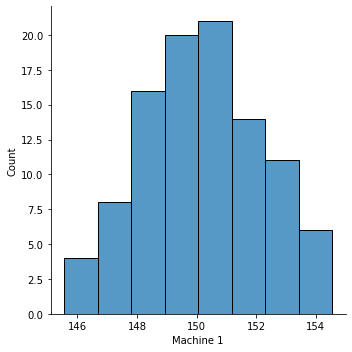

In [4]:
sns.displot(data=df, x='Machine 1')

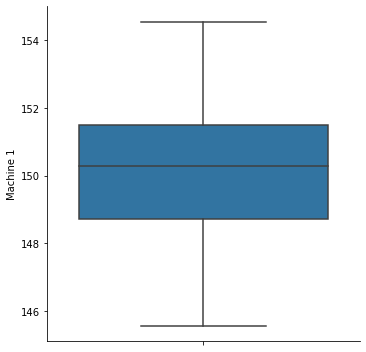

In [5]:
sns.catplot(data=df, y='Machine 1', kind='box')

In [6]:
# Here I am using the statsmodels package. If I have a choice I prefer SciPy.

weightstats.ztest(df['Machine 1'], value=150, alternative='two-sided' )

(1.0060370247722599, 0.3143977600779597)

Z calculated = 1.00 and 
p-value = 0.3143

In [ ]:
# Show 7c One Sample Z test video

xxxxxxx SciPy does not have a Z test. You can use t-test instead.

In [8]:
stats.ttest_1samp(df['Machine 1'], 150)

Ttest_1sampResult(statistic=1.0060370247722599, pvalue=0.3168503751206756)

In [5]:
weightstats.ztest(df['Machine 1'], value=150, alternative='larger')

(1.0060370247722599, 0.15719888003897986)

# One Sample t test

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats import weightstats

In [10]:
volume = pd.Series([148.5, 153.4, 150.9, 151.2])
volume.describe()

count      4.000000
mean     151.000000
std        2.004994
min      148.500000
25%      150.300000
50%      151.050000
75%      151.750000
max      153.400000
dtype: float64

In [11]:
stats.ttest_1samp(volume, 150)

Ttest_1sampResult(statistic=0.997509336107632, pvalue=0.3920333832606524)

# One Proportion Test

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [7]:
# Case 1: Has smoking habit changed
stats.binom_test(14, 100, p=0.21, alternative='two-sided')

0.1092081572082592

In [ ]:
#Case 2: Has smoking reduced? Left tail test
# Using Normal Approximation we rejected the Null, but using Binomial we failed to reject.
stats.binom_test(14, 100, p=0.21, alternative='less')

0.0504246022155211

In [11]:
df = pd.read_csv('C:\\Users\\quali\\Python\\Sandeep\\Datasets\\Smokers.csv')

In [15]:
df

,Name,Smokers
0,Person 1,No
1,Person 2,No
2,Person 3,No
3,Person 4,Yes
4,Person 5,No
...,...,...
95,Person 96,No
96,Person 97,No
97,Person 98,No
98,Person 99,No


In [16]:
df.describe()

,Name,Smokers
count,100,100
unique,100,2
top,Person 83,No
freq,1,86


In [12]:
# If you want yes/no in tabular form, use group_by
smk = df.groupby(by='Smokers').count()
smk

,Name
Smokers,
No,86
Yes,14


In [14]:
stats.binom_test(14, 100, 0.21)

0.1092081572082592

In [15]:
smk = smk.reindex(['Yes', 'No'])
smk

,Name
Smokers,
Yes,14
No,86


In [16]:
stats.binom_test(smk, p=0.21, alternative='two-sided')

array([0.10920816])

# One Variance Test

Draw a Chisquare distribution for df=50

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Ex: A sample of 51 bottles was selected. The standard deviation of these
51 bottles was 2.35 cc. Has it increased from the established 2cc?
90% confidence level.

Chi_sq_cal = (n-1)s^2 / sigma^2

In [18]:
x_ax = np.linspace(0, 100, 101)
x_ax

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

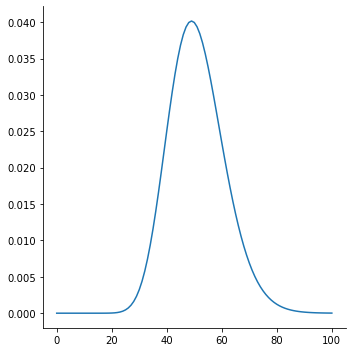

In [20]:
x_ax = np.linspace(0, 100, 101)
y_ax = stats.chi2.pdf(x_ax, df=51)
sns.relplot(x=x_ax, y = y_ax, kind='line');

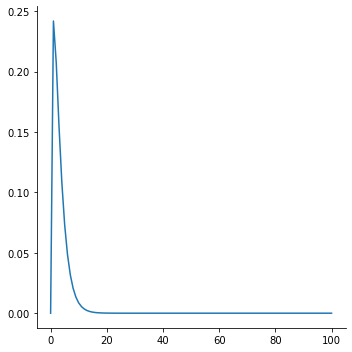

In [21]:
x_ax = np.linspace(0, 100, 101)
y_ax = stats.chi2.pdf(x_ax, df=3) # for 3 degrees of freedom
sns.relplot(x=x_ax, y = y_ax, kind='line');

In [71]:
Chi_sq_cal = (51-1)*(2.35**2)/ (2**2)
Chi_sq_cal

69.03125000000001

In [ ]:
# Chi Square Critical
# 10% area on the right for df=50 at chi-sqr
stats.chi2.isf(0.10, 50)

63.167121005726315

#### Conclusion: Reject the Null Hypothesis

### End of Section 7